In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from os.path import join as oj
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import eli5
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from torch import nn
import torch.nn.functional as F
import torch
from copy import deepcopy
from sklearn import metrics
plt.style.use('dark_background')
import mat4py
import pandas as pd
import data_tracks
import models
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from colorama import Fore
import pickle as pkl
from tqdm import tqdm
from style import *
from sklearn import decomposition
import matplotlib.gridspec as grd
import itertools
from sklearn import mixture
from matplotlib_venn import venn3, venn2
import viz
outcome_def = 'y_consec_thresh'

Using TensorFlow backend.
/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/linux/anaconda3.7/lib/pytho

In [13]:
df = data_tracks.get_data(use_processed=True, use_processed_dicts=True, 
                           outcome_def=outcome_def)
viz.print_metadata()

valid:		2066.0 aux+ / 7594 (0.272)
----------------------------------------
no_hotspots:	1735.0 aux+ / 7245 (0.239)
----------------------------------------
lifetime<=26:	4720 aux+ / 5127 (0.921)
lifetime>=145:	  62 aux- /   67 (0.925)
remaining:	1266 aux+ / 2051 (0.617)


# unsure tracks

In [67]:
df = data_tracks.get_data(use_processed=False, use_processed_dicts=True, 
                           outcome_def=outcome_def, remove_hotspots=False)

loading + preprocessing data...
	loading tracks...
	preprocessing data...
	adding features...


In [ ]:
labels_cs = {
    'pos': [2321, 11032, 4484, 4750, 8084, 6770, 6624, 2749, 6378, 7833, 4399, 9547, 2253],
    'hotspots': [10069, 5485, 3146, 5560, 5600, 5937, 7688, 6055, 5670, 10235, 5583, 6151, 5720, 2553, 6040, 292, 5456, 2437, 5966, 5499, 10043, 10232, 5434, 6224, 5785, 6210, 2761, 6359, 6438, 5423, 5774, 7556, 5766, 7882, 7732, 5798, 2711, 2562, 5939, 2214, 2881, 2588, 10123, 6527, 10309, 2038, 2683, 5617, 2146, 4117, 10821, 2538, 5408, 5527, 6079, 7499, 6641, 2930, 5683, 6353, 5958, 2154, 5835],  # note first were labeled as neg, second were labeled as pos
    'neg': [3964, 10054, 735, 846, 1362, 3823, 5389, 8834, 9565, 10882, 11166, 718]
}
labels_xl = {
    'pos': [2321, 10996, 4454, 10431, 11032, 10057, 4484, 8084, 10754, 2382, 938, 2228, 10887, 6770, 10895, 10863, 6624, 10333, 4069, 10113, 4849, 9719, 10116, 245, 10077, 9547, 9557, 10457, 10037, 9900, 10146, 5507, 10517, 2749, 9563, 6378, 2014, 9714, 1353, 10117, 7504, 9724, 3141, 5797, 10508, 10374, 5593, 9932, 4399, 10632, 1039, 9904, 9930, 8505, 429, 10331, 5470, 8557, 7773, 10830, 10749, 2031, 3822, 7833, 5791, 10602, 2203, 542, 10843, 7759, 10483, 4827, 225, 7679, 9617, 2378, 5409, 10142, 9975, 10264, 918, 10148, 10066, 9917, 9485, 6400, 5961, 10023, 10418, 231, 10695, 3065, 6420, 7865, 9813, 10765, 6290, 2270, 729, 2626, 8424, 10199, 2200, 2854, 2253],
    'hotspots': [10015, 6339, 3168, 7481, 7779, 646, 4117, 7891, 4324, 2146, 10007, 1162, 10330, 285, 5527, 7616, 5617, 4196, 7771, 2085, 1104, 5512, 8303, 4409, 7343, 2538, 7570, 3977, 2683, 2038, 10250, 2494, 10309, 8423, 2417, 6353, 2564, 685, 6471, 6527, 10123, 2173, 2588, 205, 2881, 5863, 5958, 5408, 2607, 2214, 5939, 2562, 6079, 8208, 2154, 2799, 3909, 5798, 7663, 2574, 7732, 5835, 7882, 5766, 7556, 6438, 6641, 6359, 2761, 6210, 5434, 10232, 10043, 6109, 2323, 9550, 2437, 5456, 2930, 5683, 413, 2553, 7499, 6151, 5583, 10235, 6055, 7688, 5600, 5560, 3146, 5485, 10069, 5423, 5499, 6224, 5937, 292],
    'neg': [718, 735, 846, 1362, 3823, 5389, 8834, 9565, 10882, 11166, 10054]
}
    
pos_all = set(labels_cs['pos']).union(set(labels_xl['pos']))
pos_int = set(labels_cs['pos']).intersection(set(labels_xl['pos']))
pos = pos_all - pos_int

hots_all = set(labels_cs['hotspots']).union(set(labels_xl['hotspots']))
hots_int = set(labels_cs['hotspots']).intersection(set(labels_xl['hotspots']))
hots = hots_all - hots_int

neg_all = set(labels_cs['neg']).union(set(labels_xl['neg']))
neg_int = set(labels_cs['neg']).intersection(set(labels_xl['neg']))
neg = neg_all - neg_int
print(len(pos), len(hots), len(neg))
print(neg)

for k, inds in zip(['pos', 'hots', 'neg'], [pos, hots, neg]):
    d = df[df.pid.isin(inds)]
    print(k, d.shape)
    R, C = 11, 10
    plt.figure(figsize=(20, 24)) #, dpi=200)
    lifetime_max = np.max(df.lifetime.values[:R*C])
    print(lifetime_max)
    for i in range(R * C):
        if i < d.shape[0]:
            plt.subplot(R, C, i + 1)
            row = d.iloc[i]
            plt.plot(row.X, color='red', label='clathrin')
            plt.plot(row.Y, color='green', label='auxilin')
            plt.axhline(642.3754691658837, color='gray', alpha=0.5)
            plt.xlim([-1, lifetime_max + 1])
            plt.title(row.pid)
    #         plt.ylim([-10, max(max(df.X_max), max(df.Y_max)) + 1])
            plt.axis('off')
    plt.savefig(k + '.pdf')
    plt.legend()
    plt.tight_layout()
#     plt.show()

# visualize outcomes
- take mean, take sigma, define events with a threshold

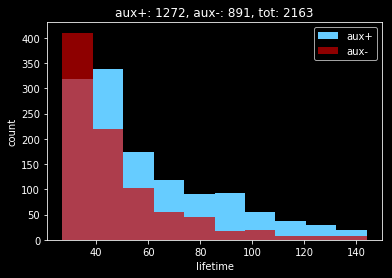

In [6]:
outcome = df[outcome_def]
aux_pos = df['lifetime'][outcome==1] 
aux_neg = df['lifetime'][outcome==0] 
plt.hist(aux_pos, label='aux+', alpha=1, color=cb)
plt.hist(aux_neg, label='aux-', alpha=0.7, color=cr)
plt.xlabel('lifetime')
plt.ylabel('count')
plt.title(f'aux+: {aux_pos.shape[0]}, aux-: {aux_neg.shape[0]}, tot: {df.shape[0]}')
plt.legend()
plt.show()

In [6]:
def sort_outcome(df, outcome_def):
    outcome_score = df['Y_max'].values
    idxs_sort = np.argsort(outcome_score)
    return df[outcome_def].values[idxs_sort], df['Y'].values[idxs_sort]

outcome_sort, Y_sort = sort_outcome(df, outcome_def)

### Find rule-based model to define aux+

In [5]:
verified_pids = data_tracks.get_labels()

In [6]:
def cummax(arr):
    res = [arr[0]]
    for i in range(1, len(arr)):
        res.append(max(arr[i], res[i-1]))
    return res
    
def max_fall(arr):
    cm = cummax(arr)
    return np.max(np.array(cm) - np.array(arr))
    
def max_diff(arr):
    return np.max(-np.diff(arr)) 

def max_absolute_fall(arr):
    cm_rev = cummax(arr[::-1])[::-1]
    return max(arr[i] - cm_rev[i+1] for i in range(len(arr)-1))

In [108]:
# peak time
df['Y_peak_time_frac'] = df['Y_peak_idx'].values / df['lifetime'].values
df['peak_time_frac_diff'] = df['Y_peak_time_frac']  - df['X_peak_time_frac'] 

In [473]:
# local
X_max_around_Y_peak = []
X_max_before_Y_peak = []
X_max_after_Y_peak = []
X_max_fall_around_Y_peak = []  # max fall def: in a window around aux peak, max_{t_1>t_2} Cla(t_1) - Cla(t_2)
X_max_diff_around_Y_peak = []  # max_{t in window} Cla(t) - Cla(t-1)
X_max_abs_fall_around_Y_peak = []

for i in range(len(df)):
    pt = df['Y_peak_idx'].values[i]
    lt = df['lifetime'].values[i]
    left_bf = np.int(0.2 * lt)
    right_bf = np.int(0.2 * lt)
    arr_before = df['X'].iloc[i][: max(1, pt - left_bf)]
    arr_around = df['X'].iloc[i][max(0, pt - left_bf): min(pt + right_bf, lt)]
    arr_after = df['X'].iloc[i][min(pt + right_bf, lt - 1): ]
    X_max_fall_around_Y_peak.append(max_fall(arr_around))
    X_max_diff_around_Y_peak.append(max_diff(arr_around))
    X_max_before_Y_peak.append(min(arr_before))
    X_max_around_Y_peak.append(max(arr_around))
    X_max_after_Y_peak.append(max(arr_after))
    X_max_abs_fall_around_Y_peak.append(max_absolute_fall(arr_around))
    
df['X_max_fall_around_Y_peak'] = X_max_fall_around_Y_peak
df['X_max_abs_fall_around_Y_peak'] = X_max_abs_fall_around_Y_peak
df['X_max_diff_around_Y_peak'] = X_max_diff_around_Y_peak
df['X_max_around_Y_peak'] = X_max_around_Y_peak
df['X_max_before_Y_peak'] = X_max_before_Y_peak
df['X_max_after_Y_peak'] = X_max_after_Y_peak
df['X_max_diff_around_before'] = df['X_max_around_Y_peak'] - df['X_max_before_Y_peak']
df['X_max_diff_around_after'] = df['X_max_around_Y_peak'] - df['X_max_after_Y_peak']
df['y_z_score'] = (df['Y_max'].values - df['Y_mean'].values)/df['Y_std'].values

In [577]:
def ols_coef(x, y):
    cov_mat = np.cov(x, y)
    coef = cov_mat[0, 1]/cov_mat[0, 0]
    corr = cov_mat[0, 1]/np.sqrt(cov_mat[0, 0] * cov_mat[1, 1])
    return coef, corr

X_lr_coef_after_Y_peak = []
X_lr_coef_before_Y_peak = []
for i in range(len(df)):
    pt = df['X_peak_idx'].values[i]
    lt = df['lifetime'].values[i]
    if lt - pt>1 and pt >= 1:
        arr_after = df['X'].iloc[i][pt: min(pt+11, lt)]
        coef, corr = ols_coef(np.array(range(pt, min(pt+11, lt))), arr_after)
        coef_before, _ = ols_coef(np.array(range(max(pt-11, 0), pt + 1)), arr_before)
        X_lr_coef_after_Y_peak.append(corr)
        X_lr_coef_before_Y_peak.append(coef_before)
    else:
        X_lr_coef_after_Y_peak.append(0)
        X_lr_coef_before_Y_peak.append(0)
df['X_lr_coef_after_Y_peak'] = X_lr_coef_after_Y_peak
df['X_lr_coef_before_Y_peak'] = X_lr_coef_before_Y_peak

In [169]:
Y_feat_names = ['X_max',
                'y_consec_sig', 
                'y_conservative_thresh', 
                'Y_peak_time_frac',
                'Y_max',
                'y_z_score',
                #'y_score',
                #'y_thresh',
                #'peak_time_frac_diff',
                #'y_num_sig',
                #'X_max_fall_around_Y_peak',
                #'X_lr_coef_after_Y_peak',
                #'X_lr_coef_before_Y_peak',
                #'X_max_diff_around_Y_peak',
                #'X_max_abs_fall_around_Y_peak',
                'X_max_diff', 
                #'X_max_diff_around_before'
                ]

In [39]:
import math
def rule_based_label(t):
    if t['Y_peak_time_frac'] < 0.2:
        return 0
    if t['y_consec_sig'] or t['y_conservative_thresh']:
        return 1
    if t['X_max_diff'] > 260 and t['y_z_score'] > 2.6:
        return 1
    return 0

#p_label = np.array([rule_based_label(df_label_verified.iloc[i]) for i in range(len(df_label_verified))])

#np.mean(p_label == df_label_verified[outcome_def].values)



In [96]:
import math
def rule_based_model(track):
    if track['y_consec_sig'] or track['y_conservative_thresh']:
        return 1
    if track['X_max_diff'] > 350 and track['Y_max'] > 560:
        return 1
    return 0


def get_rule_based_label(df):
    
    df['Y_peak_time_frac'] = df['Y_peak_idx'].values / df['lifetime'].values
    df['y_z_score'] = (df['Y_max'].values - df['Y_mean'].values)/df['Y_std'].values
    X_max_around_Y_peak = []
    X_max_after_Y_peak = []
    X_max_fall_around_Y_peak = []
    for i in range(len(df)):
        pt = df['Y_peak_idx'].values[i]
        lt = df['lifetime'].values[i]
        left_bf = np.int(0.2 * lt)
        right_bf = np.int(0.1 * lt)
        arr_around = df['X'].iloc[i][max(0, pt - left_bf): min(pt + right_bf, lt)]
        arr_after = df['X'].iloc[i][min(pt + right_bf, lt - 1): ]
        #X_max_fall_around_Y_peak.append(max_fall(arr_around))
        X_max_around_Y_peak.append(max(arr_around))
        X_max_after_Y_peak.append(max(arr_after))
    #df['X_max_fall_around_Y_peak'] = X_max_fall_around_Y_peak
    df['X_max_around_Y_peak'] = X_max_around_Y_peak
    df['X_max_after_Y_peak'] = X_max_after_Y_peak
    df['X_max_diff'] = df['X_max_around_Y_peak'] - df['X_max_after_Y_peak']
    
    df['y_rule_based'] = np.array([rule_based_model(df.iloc[i]) for i in range(len(df))])
    return df
    

In [97]:
#df['y_rule_based'] = np.array([rule_based_label(df.iloc[i]) for i in range(len(df))])
df = get_rule_based_label(df)
#verified_pids = data_tracks.get_labels()
outcome_def = 'y_consec_thresh' 
#df_label_verified = df[df.pid.isin(verified_pids['neg'] + verified_pids['pos'])]
np.mean(df['y_rule_based'] == df[outcome_def].values)

0.9302779132130667

In [172]:
outcome_def = 'y_consec_thresh' 
#df_label_verified = df[df.pid.isin(verified_pids['neg'] + verified_pids['pos'])]
X = df[feat_names + Y_feat_names] 
y = df[outcome_def].values 
     
m = RandomForestClassifier(n_estimators=100) 
#m = LogisticRegression()
num_pts_by_fold_cv = [] 
cv_accuracy = [] 
 
cell_nums_train = np.array([1, 2, 3, 4, 5]) 
kf = KFold(n_splits=len(cell_nums_train)) 
 
for cv_idx, cv_val_idx in kf.split(cell_nums_train): 
     
    idxs_test = df.cell_num.isin(cell_nums_train[np.array(cv_val_idx)]) 
    idxs_train = df.cell_num.isin(cell_nums_train[np.array(cv_idx)]) 
    X_test, Y_test = X[idxs_test], y[idxs_test] 
    X_train, Y_train = X[idxs_train], y[idxs_train] 
    num_pts_by_fold_cv.append(len(X_test)) 
    m.fit(X_train, Y_train) 
    cv_accuracy.append(m.score(X_test, Y_test)) 
     
np.average(cv_accuracy, weights=num_pts_by_fold_cv)

0.937989163154726

In [33]:
m.feature_importances_

array([0.04421338, 0.04018238, 0.19557851, 0.08435148, 0.06545535,
       0.31853723, 0.14218359, 0.10949808])

In [ ]:
R, C = 4, 3
plt.figure(figsize=(6, 4), dpi=200)
lifetime_max = np.max(df.lifetime.values[:R*C])
negs = np.where(df_label_verified['y_consec_thresh'] == 0)[0]
k = 0
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    row = df.iloc[i]
    while df_label_verified.iloc[negs[k]].X_max_diff_around_after < 500:
        k += 1
    #n1 = np.where(df['y_consec_thresh'] == 1)[0][i]
    plt.plot(df_label_verified.iloc[negs[k]].X, color='red', label='clathrin')
    plt.plot(df_label_verified.iloc[negs[k]].Y, color='green', label='auxilin')
    plt.xlim((0, 100))
    k += 1
    #if not i == R * C - C:
    #plt.yticks([])
    #plt.xticks([])
#plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
R, C = 6, 3
plt.figure(figsize=(6, 6), dpi=200)
lifetime_max = np.max(df.lifetime.values[:R*C])
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    n1 = np.where(df_label_verified['y_consec_thresh'] > )[0][i]
    #n1 = np.where(df['y_consec_thresh'] == 1)[0][i]
    plt.plot(df_label_verified.iloc[n1].X, color='red', label='clathrin')
    plt.plot(df_label_verified.iloc[n1].Y, color='green', label='auxilin')
    plt.xlim((0, 100))
    #if not i == R * C - C:
    #plt.yticks([])
    #plt.xticks([])
#plt.legend()
plt.tight_layout()
plt.show()

In [165]:
from sklearn.manifold import TSNE
df_X = df_no_consec[Y_feat_names]

In [159]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(df_X)

In [166]:
tsne = TSNE(n_components=2, perplexity=30)
df_X = (df_X - df_X.mean()) / df_X.std()
X_new = tsne.fit_transform(df_X)


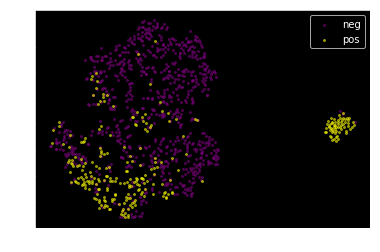

In [167]:
fig, ax = plt.subplots()
#X_new = X_new[np.where(df.y_consec_sig == False)[0],:]
neg = np.where(df_no_consec[outcome_def] == False)[0]
pos = np.where(df_no_consec[outcome_def] == True)[0]
ax.scatter(X_new[neg,0], X_new[neg,1], c='purple', label='neg', alpha=.5, s=4)
ax.scatter(X_new[pos,0], X_new[pos,1], c='yellow', label='pos', alpha=.5, s=4)
ax.legend()
plt.show()

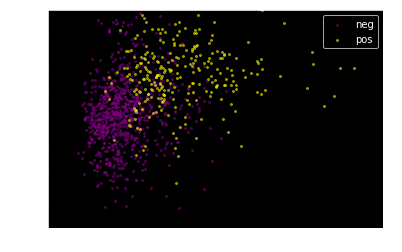

In [153]:
fig, ax = plt.subplots()
df_no_consec = df[df.y_consec_sig == False]
neg = np.where(df_no_consec[outcome_def] == False)[0]
pos = np.where(df_no_consec[outcome_def] == True)[0]
ax.scatter(df_no_consec['Y_max'].values[neg], df_no_consec['X_max_diff'].values[neg], c='purple', label='neg', alpha=.5, s=4)
ax.scatter(df_no_consec['Y_max'].values[pos], df_no_consec['X_max_diff'].values[pos], c='yellow', label='pos', alpha=.5, s=4)
ax.legend()
ax.set_ylim((-2000, 2000))
ax.set_xlim((0, 2000))
plt.show()

In [173]:
def extract_X_mat(df):
    p1 = max(df['X_peak_idx'].values)
    p2 = max(df['lifetime'].values - df['X_peak_idx'].values)
    n = df.shape[0]
    X_mat = np.zeros((n, p1 + p2)).astype(np.float32)
    X = df['X'].values
    for i in range(n):
        x = X[i]
        start = (p1 - df['X_peak_idx'].values[i])
        end = start + df['lifetime'].values[i]
        X_mat[i, start:end] = x
    X_mat = np.nan_to_num(X_mat)
    #X_mat -= np.min(X_mat)
    #X_mat /= np.std(X_mat)
    return X_mat

In [174]:
df_X_mat = extract_X_mat(df)

In [176]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_max_aligned = pca.fit_transform(df_X_mat)

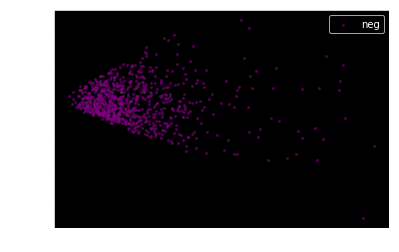

In [180]:
fig, ax = plt.subplots()
#X_new = X_new[np.where(df.y_consec_sig == False)[0],:]
neg = np.where(df[outcome_def] == False)[0]
pos = np.where(df[outcome_def] == True)[0]
ax.scatter(X_max_aligned[neg,0], X_max_aligned[neg,1], c='purple', label='neg', alpha=.5, s=4)
#ax.scatter(X_max_aligned[pos,0], X_max_aligned[pos,1], c='yellow', label='pos', alpha=.5, s=4)
ax.legend()
plt.show()

In [192]:
df_X_mat.shape

(2051, 247)

In [199]:
tsne = TSNE(n_components=2, perplexity=150)
df_X_mat = (df_X_mat - df_X_mat.mean()) / df_X_mat.std()
X_new = tsne.fit_transform(df_X_mat)

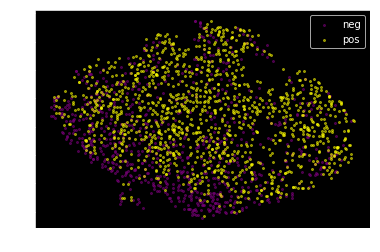

In [200]:
fig, ax = plt.subplots()
#X_new = X_new[np.where(df.y_consec_sig == False)[0],:]
neg = np.where(df[outcome_def] == False)[0]
pos = np.where(df[outcome_def] == True)[0]
ax.scatter(X_new[neg,0], X_new[neg,1], c='purple', label='neg', alpha=.5, s=4)
ax.scatter(X_new[pos,0], X_new[pos,1], c='yellow', label='pos', alpha=.5, s=4)
ax.legend()
plt.show()

# viz curves

In [ ]:
viz.plot_curves(df[df.pid.isin(data_tracks.get_labels()['hotspots'])])

In [ ]:
R, C = 4, 5
# plt.figure(dpi=200)
plt.figure(figsize=(9, 8), dpi=200)
n = Y_sort.shape[0]
# idxs = list(range(10)) + list(range(n - 10, n)) # let's look at the top / bot
idxs = list(range(num_neg - 40, num_neg + 40)) # let's look at ones in the middle
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    idx = idxs[i]
    plt.plot(Y_sort[idx], color=cr if outcome_sort[idx] == 0 else cb)
#     plt.axis('off')
plt.tight_layout()

**compare as a func of aux_max**

In [ ]:
R, C = 20, 28
# plt.figure(dpi=200)
plt.figure(figsize=(28, 20))
n = Y_sort.shape[0] # 1434

idxs = np.array([np.arange(int(i), int(i) + C) for i in np.linspace(0, n - C, R)]).flatten() #list(range(10)) + list(range(n - 10, n))
Ys = Y_sort[idxs]
ymin = -200
ymax = 4000

for i in range(R * C):
    plt.subplot(R, C, i + 1)
    idx = idxs[i]
    plt.plot(Ys[i], color=cr if outcome_sort[idx] == 0 else cb, lw=1)
    plt.ylim((ymin - 1, ymax + 1))
    plt.xlim((0, 120))
    if not i == R * C - C:
        plt.yticks([])
        plt.xticks([])
    if i % C == 0:
        plt.ylabel(f'{np.max(Ys[i]):.0f}')
#     plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('def.pdf')

In [ ]:
aux_plus = df[outcome_def] == 1
plt.hist(df[aux_plus]['Y_max'], color=cb, label='aux+', bins=100)
plt.hist(df[~aux_plus]['Y_max'], color=cr, label='aux-', alpha=0.7, bins=100)
plt.xlabel('aux_max')
plt.ylabel('count')
plt.legend()
plt.show()

**look at hotspots**

In [16]:
dfh = data_tracks.get_data(use_processed=True, remove_hotspots=False,
                         processed_file='processed/df_with_hotspots.pkl', metadata_file='processed/metadata_with_hotspots.pkl',)

loading + preprocessing data...
	loading tracks...
	preprocessing data...
	adding features...
dict features not added!


In [ ]:
dh = dfh[df.hotspots==1]
R = int(np.sqrt(dh.shape[0]))
C = (dh.shape[0] // R) + 1
plt.figure(figsize=(C, R), dpi=200)

for i in range(R * C):
    if i < dh.shape[0]:
        ax = plt.subplot(R, C, i + 1)
        row = dh.iloc[i]
        plt.axis('off')
        Y = np.array(row['Y'])
        ts = np.arange(Y.size)
        plt.plot(ts, np.array(row['X']), color=cr, lw=1)
        plt.plot(ts, Y, color='green', lw=1)
        plt.plot(ts[row['sig_idxs']==True], Y[row['sig_idxs']], 'o', color='white', ms=1, alpha=0.5)

    #     plt.plot(dh.iloc[i]['X'], color='red')
        ax.text(.5, .9, f'{i}',
                         horizontalalignment='right',
                         transform=ax.transAxes)


        plt.ylim((-1000, 4000))
        plt.xlim((0, 120))

# plt.suptitle(f'clath divided by 2 to fit on same scale xscale is 120')
plt.tight_layout()
plt.savefig('hotspots.pdf')
plt.show()

# compare different outcome defs

In [ ]:
keys = ['y_thresh', 'y_single_sig', 'y_double_sig', 'y_consec_sig', 'y']
mat = df[keys] #.corr()# make fig
# plt.figure(dpi=200)
# sns.heatmap(mat.corr(method='spearman'), annot=True,
#             cmap=sns.diverging_palette(10, 240, as_cmap=True, center='light'), vmin=-1, vmax=1)
# plt.show()

plt.figure(dpi=200)
sns.barplot(x=keys, y=mat.sum(), color=cb, alpha=1)
plt.ylabel('num aux+')
plt.xlabel('aux+ definition')

In [ ]:
plt.figure(dpi=200)
idxs = np.arange(df.shape[0])
keys = ['y_thresh', 'y_single_sig', 'y_consec_sig']
venn3([set(idxs[df[keys[0]] == 1]), set(idxs[df[keys[1]] == 1]), set(idxs[df[keys[2]] == 1])], keys)
plt.show()

# analyze aux+ p-value / amplitude defs

In [4]:
aux = df.Y
aux_p = df.Y_pvals

ys = np.array(list(itertools.chain.from_iterable(aux)))
ps = np.array(list(itertools.chain.from_iterable(aux_p.values)))

ps_sig = ps < 0.05

In [ ]:
R = 1
C = 2
plt.figure(figsize=(8, 4), dpi=200)
plt.subplot(R, C, 1)
plt.hist(ps, bins=100, color=cb) #ps[(ps < 0.5) * (ps > 0.01)])
plt.yscale('log')
plt.axvline(0.05, color=cr)
plt.xlabel('auxilin p-value')
plt.ylabel('count (log-scale)')
# plt.xscale('log')
# plt.ylabel()
# plt.xlim((0, 0.1))
print(f'num sig {np.sum(ps_sig):,d}')
print(f'num nonsig {np.sum(~ps_sig):,d}')

plt.subplot(R, C, 2)
ys_sig = ys[ps_sig]
(counts, bins, _) = plt.hist(ys_sig, bins=180, color=cb) #ps[(ps < 0.5) * (ps > 0.01)])
idx_max = np.argmax(counts)
aux_max = bins[idx_max]
plt.axvline(aux_max, color=cr)
plt.xlabel('auxilin amplitude')
plt.ylabel('count')
plt.tight_layout()
plt.show()

print('aux_max', aux_max)

In [ ]:
ys_sig = ys_sig.reshape(-1, 1)
mog = mixture.GaussianMixture(n_components=3)
mog.fit(ys_sig.reshape(-1, 1))
preds = mog.predict(ys_sig.reshape(-1, 1))

# plot hist
plt.figure(dpi=200)
plt.hist(ys_sig, bins=bins, alpha=1, color=cb) #ps[(ps < 0.5) * (ps > 0.01)])
samples, comps = mog.sample(n_samples=ys_sig.size) 
for i in [0, 2, 1]:
    idxs = comps==i
    plt.hist(samples[idxs], bins=bins, alpha=0.75, label=f'{mog.means_[i, 0]}')
plt.axvline(aux_max, color='white')
# plt.legend()

plt.xlabel('auxilin amplitude (significant only)')
plt.ylabel('count')
plt.show()